## Model and Config Setup

In [1]:
import sys
import os

# Add the project's root directory to the Python path
try:
    project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
except IndexError:
    project_root = os.path.abspath(os.path.join(os.getcwd()))

if project_root not in sys.path:
    sys.path.insert(0, project_root)

from utils import setup_llm_client, get_vision_completion, get_image_generation_completion, get_completion, save_artifact, clean_llm_output, recommended_models_table
from IPython.display import Image, display, Code

image_client, image_model_name, image_api_provider = setup_llm_client(model_name="gemini-2.5-flash-image-preview")
print(f"✅ Using {image_model_name} for image generation")

# Ensure you select a vision-capable model
vision_client, vision_model_name, vision_api_provider = setup_llm_client(model_name="gemini-2.5-pro")
print(f"✅ Using {vision_model_name} for vision tasks")


if not image_model_name or not vision_model_name:
    print("Could not set up a valid LLM client. Please check your .env file and utils.py configuration.")

2025-11-05 16:24:19,346 ag_aisoftdev.utils INFO LLM Client configured provider=google model=gemini-2.5-flash-image-preview latency_ms=None artifacts_path=None
2025-11-05 16:24:19,359 ag_aisoftdev.utils INFO LLM Client configured provider=google model=gemini-2.5-pro latency_ms=None artifacts_path=None


✅ Using gemini-2.5-flash-image-preview for image generation
✅ Using gemini-2.5-pro for vision tasks


## Get the Desired UI Screenshot for View

Using gemini-2.5-flash-image-preview for image generation...
✅ Generated image saved to: /Users/brianfisher/trainingRepos/220372-AG-AISOFTDEV-Team-1-AINavigators/artifacts/screens/image_1762377869.png



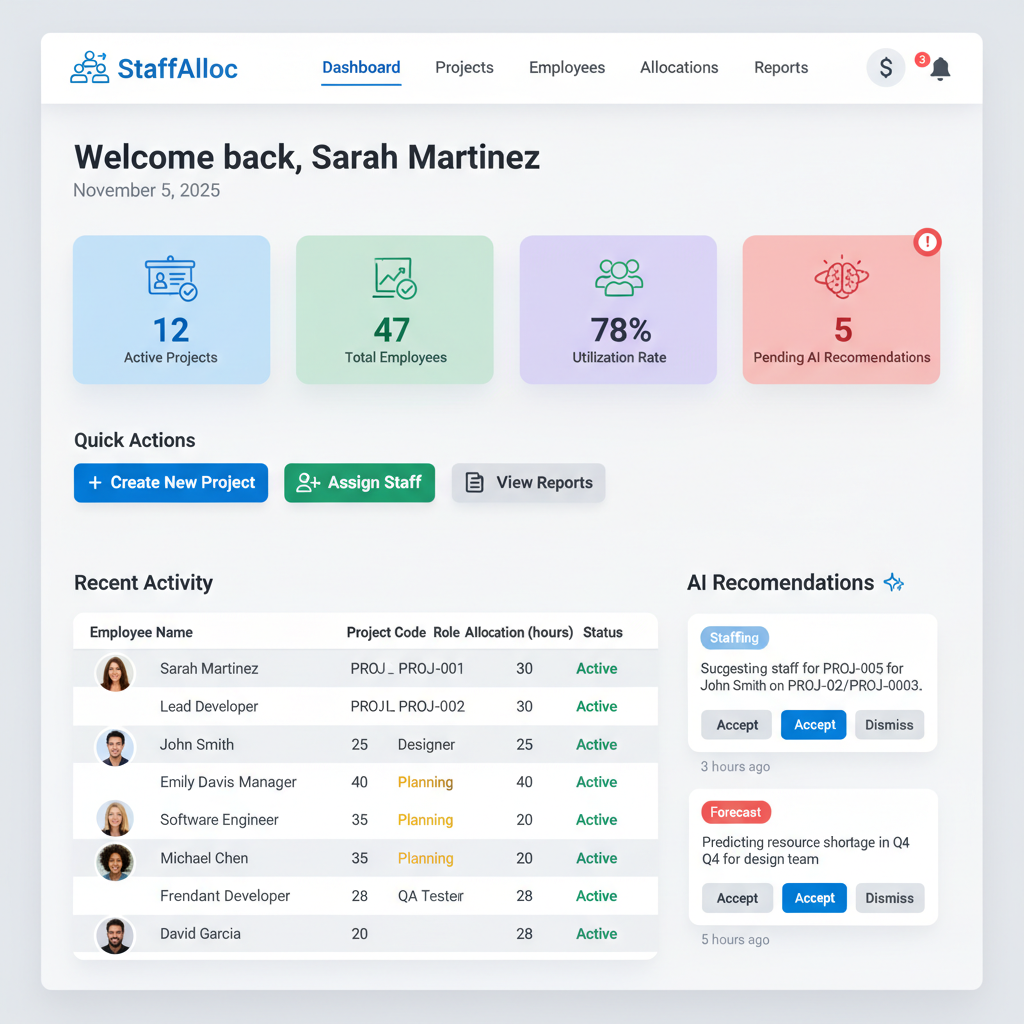

In [2]:
# VIEW 1: Dashboard
# This generates the main dashboard view with metrics, quick actions, and AI recommendations

screen_generation_prompt = """
Create a modern, professional dashboard UI for a staff allocation management platform called "StaffAlloc". 

The dashboard should include:

**Header Section:**
- Top navigation bar with the "StaffAlloc" logo on the left (use a simple text logo with an icon)
- Navigation menu items: Dashboard (active), Projects, Employees, Allocations, Reports
- User profile icon and notifications bell on the right
- Clean, modern design with a subtle shadow below the header

**Main Content Area:**
- Welcome message "Welcome back, Sarah Martinez" with current date "November 5, 2025"
- 4 metric cards in a 2x2 grid showing:
  * Active Projects: 12 (with project icon)
  * Total Employees: 47 (with users icon)
  * Utilization Rate: 78% (with chart icon)
  * Pending AI Recommendations: 5 (with AI sparkle icon and red notification badge)
- Each card should have: icon in color, large number, label, and subtle background color with shadow

**Quick Actions Section:**
- "Quick Actions" heading
- 3 action buttons in a horizontal row:
  * "Create New Project" (blue/primary with + icon)
  * "Assign Staff" (green with user-plus icon)
  * "View Reports" (gray/secondary with document icon)

**Recent Activity Section (Left Side, ~60% width):**
- "Recent Activity" heading
- Table showing recent project assignments with columns:
  * Employee Name (with small avatar circle)
  * Project Code
  * Role
  * Allocation (hours)
  * Status (colored badge: Active=green, Planning=yellow)
- 5-6 rows of realistic sample data
- Clean table styling with alternating row backgrounds

**AI Recommendations Panel (Right Sidebar, ~40% width):**
- "AI Recommendations" heading with a small AI sparkle icon
- 3 recommendation cards, each showing:
  * Type badge (Staffing=blue, Conflict=red, Forecast=purple)
  * Brief text description (2 lines)
  * Two small buttons: "Accept" (blue) and "Dismiss" (gray outline)
  * Small timestamp text "2 hours ago"
- Cards stacked vertically with spacing

**Design Style:**
- Modern, clean interface with plenty of white space
- Professional color scheme: primary blue (#3B82F6), success green (#10B981), subtle grays (#F3F4F6 backgrounds)
- Card-based layout with subtle shadows (shadow-sm)
- Rounded corners on all cards and buttons (rounded-lg)
- Clear typography hierarchy: headings bold, body text regular
- Responsive grid layout
- Professional SaaS application aesthetic
- Icons should be simple line icons or outlined style

**Overall Layout:**
- Full-width header at top
- Main content below with padding
- Metric cards in full-width grid
- Quick actions below metrics
- Two-column layout for Recent Activity (left) and AI Recommendations (right)

Make it look like a polished, production-ready enterprise SaaS application with modern design trends (circa 2024-2025).
"""

print(f"Using {image_model_name} for image generation...")
file_path, image_url = get_image_generation_completion(screen_generation_prompt, image_client, image_model_name, image_api_provider)

# Display the generated image if successful
if file_path and image_url:
    print(f"✅ Generated image saved to: {file_path}")
    display(Image(url=image_url))
elif image_url:
    print(f"❌ Image generation failed: {image_url}")
else:
    print("❌ Image generation returned no result")

## Generate Monolithic UI Code

First, generate an explanation of the image to pass to the model

In [3]:
image_path = file_path

explain_image_prompt = f"""
You are an expert frontend developer and UI/UX designer. Analyze the provided image and produce a clear, actionable explanation for a developer who will implement the UI.

Please respond in markdown and include the following sections:

1) Summary: One-sentence summary of what this screen is (purpose).
2) Visual Breakdown: Enumerate the visible UI elements (e.g., header, logo, form fields, buttons, icons, images) and approximate positions (top/left/center, grouping).
3) Style Details: Describe colors, font styles (weight/size/line-height if evident), spacing, borders/radii, shadows, and alignment cues.
4) Interaction & Behavior: Identify interactive elements and the likely behaviors (hover/focus states, validation, keyboard affordances).
5) Accessibility Notes: Potential accessibility issues and recommended fixes (labels, contrast, focus order).
6) Implementation Plan (React + Tailwind): Suggest component names and a short mapping of each component to Tailwind utilities or structure (e.g., <LoginForm> -> container: flex, gap-4, ...). Keep this as a concise checklist.

Keep the output developer-focused and actionable.
"""

print("--- Requesting image explanation from vision model ---")
if vision_model_name:
    explanation = get_vision_completion(explain_image_prompt, image_path, vision_client, vision_model_name, vision_api_provider)
    cleaned_explanation = clean_llm_output(explanation, language="markdown")
    display(Code(cleaned_explanation, language="markdown"))
    # Save the explanation for later reference (organized by view)
    save_artifact(cleaned_explanation, "dashboard_image_explanation.md", overwrite=True)
    print("✅ Saved explanation to artifacts/dashboard_image_explanation.md")
else:
    print("Skipping image explanation because no vision model is configured.")

--- Requesting image explanation from vision model ---


Of course. Here is a detailed, developer-focused analysis of the provided UI.

***

### 1) Summary
This screen is a user dashboard for a staff allocation application, providing a high-level overview of key metrics, quick actions, recent activities, and AI-powered recommendations.

### 2) Visual Breakdown
The UI is structured in a standard dashboard layout within a light gray main container.

*   **Header (Top):**
    *   **Top-Left:** Logo with an icon and the text "StaffAlloc".
    *   **Top-Center:** A list of navigation links: "Dashboard", "Projects", "Employees", "Allocations", "Reports". "Dashboard" is the active page.
    *   **Top-Right:** A group of two icons: a dollar sign ($) and a bell for notifications. The bell has a red notification badge with the number '3'.

*   **Main Content Area (Below Header):**
    *   **Page Greeting (Top):** A large "Welcome back, Sarah Martinez" heading, with the current date "November 5, 2025" underneath.
    *   **Stats Cards (Upper-Mid):** A horizontal row of four summary cards.
        *   **Card 1 (Blue):** "12 Active Projects"
        *   **Card 2 (Green):** "47 Total Employees"
        *   **Card 3 (Purple):** "78% Utilization Rate"
        *   **Card 4 (Red):** "5 Pending AI Recommendations", with a red alert icon in the top-right corner.
    *   **Quick Actions (Middle):** A section with a heading and three action buttons.
        *   **Button 1:** "+ Create New Project" (Primary, solid blue)
        *   **Button 2:** "Assign Staff" (Secondary, solid green)
        *   **Button 3:** "View Reports" (Tertiary, light gray)
    *   **Two-Column Layout (Bottom):** The main content area is split into two columns.
        *   **Left Column:** "Recent Activity" card containing a table-like list.
            *   **Table Header:** Employee Name, Project Code, Role, Allocation (hours), Status.
            *   **Table Rows:** Each row displays an employee's avatar, name, role, and other details. The "Status" appears to be a badge-like element.
        *   **Right Column:** "AI Recommendations" card containing a vertical feed of recommendation items.
            *   Each recommendation is a self-contained card with a category tag (e.g., "Staffing", "Forecast"), descriptive text, action buttons ("Accept", "Dismiss"), and a timestamp (e.g., "3 hours ago").

### 3) Style Details
The design is clean, modern, and uses a consistent design system.

*   **Colors:**
    *   **Background:** A very light gray (e.g., `#F8F9FA`).
    *   **Card Background:** White (`#FFFFFF`).
    *   **Primary Action:** A strong blue (e.g., `#0D6EFD`). Used for the logo, active nav link, and primary button.
    *   **Secondary Action:** A medium green (e.g., `#198754`).
    *   **Text:** Dark charcoal/almost black for headings (e.g., `#212529`), a slightly lighter gray for body text and labels (e.g., `#6C757D`).
    *   **Status/Stat Tints:**
        *   Blue: A light, desaturated blue (e.g., `#E0EFFF`).
        *   Green: A light, minty green (e.g., `#D1F4E4`).
        *   Purple: A light lavender (e.g., `#E8E3FF`).
        *   Red/Warning: A light pink/salmon (e.g., `#FEE2E2`) with a brighter red for notifications (e.g., `#DC3545`).
        *   Yellow/Planning: A pale yellow/orange (e.g., `#FFF3CD`).
*   **Typography:**
    *   **Font Family:** A clean, modern sans-serif (e.g., Inter, Poppins, or system-ui).
    *   **Headings:**
        *   Welcome Heading: `font-bold`, approx. `32-36px`.
        *   Section Headings ("Quick Actions", etc.): `font-semibold`, approx. `20-22px`.
    *   **Statistics:** The large numbers in the stat cards are very bold (`font-extrabold`) and large (approx. `48px`). The labels below are smaller (`14px`) and have regular weight.
    *   **Body/Table Text:** Regular weight, approx. `14-16px`.
*   **Spacing:**
    *   Generous padding within all cards (approx. `24px`).
    *   Consistent gaps between elements (e.g., between stat cards, between columns), likely `24px` or `32px`.
*   **Borde

✅ Saved explanation to artifacts/dashboard_image_explanation.md


Now, generate the monolithic front-end code for the generated view

In [4]:
from utils import load_artifact

# Load the image explanation generated in the previous step
image_explanation = load_artifact("dashboard_image_explanation.md")

generate_ui_prompt = f"""
You are an expert frontend developer specializing in React and Tailwind CSS. Your task is to analyze the provided design image and generate a single, self-contained React component that precisely replicates the visual design.

You also have access to an image explanation generated by a previous model: 
{image_explanation}

**Requirements:**
1. Analyze the image carefully, paying attention to:
   - Layout structure, spacing, and alignment
   - Colors, typography, font sizes, and font weights
   - Border radii, shadows, and visual effects
   - All UI elements (buttons, inputs, text, icons, images, etc.)
   - Exact positioning and grouping of elements

2. Generate a single React functional component using:
   - React functional component syntax with TypeScript (optional types)
   - Tailwind CSS utility classes for ALL styling (no inline styles or separate CSS)
   - Semantic HTML elements where appropriate
   - Proper accessibility attributes (aria-labels, roles, etc.)
   - Use Heroicons or Lucide React for icons (imported from libraries)

3. Output format:
   - Export a single default component (e.g., `export default function DashboardView()`)
   - Include all necessary imports at the top
   - Use Tailwind CSS classes exclusively for styling
   - Match colors, spacing, typography, and layout as accurately as possible
   - Include placeholder text and content that matches the design
   - Ensure responsive design considerations where visible in the image

4. Code quality:
   - Clean, readable code with appropriate comments if needed
   - Proper JSX structure and formatting
   - Use semantic HTML elements
   - Include interactive states (hover, focus) where visually indicated

**Output ONLY the React component code. Do not include explanations, markdown formatting, or additional text outside of the code.**
"""

print("--- Generating Monolithic UI Component ---")
if vision_model_name:
    generated_monolithic_code = get_vision_completion(generate_ui_prompt, image_path, vision_client, vision_model_name, vision_api_provider)
    cleaned_code = clean_llm_output(generated_monolithic_code, language='jsx')
    display(Code(cleaned_code, language='jsx'))
    # Save the monolithic code
    save_artifact(cleaned_code, "dashboard_monolithic.jsx", overwrite=True)
    print("✅ Saved monolithic code to artifacts/dashboard_monolithic.jsx")
else:
    print("Skipping UI generation because no valid model is configured.")
    cleaned_code = ""

--- Generating Monolithic UI Component ---


import React from 'react';
import { Users, Briefcase, UsersRound, Percent, BrainCircuit, Bell, DollarSign, Plus, UserPlus, BarChart3, Sparkles, AlertCircle } from 'lucide-react';

// Type definitions for our data structures
type Activity = {
  name: string;
  role: string;
  avatar: string;
  projectCode: string;
  allocation: number;
  roleAllocation: number;
  status: 'Active' | 'Planning';
};

type Recommendation = {
  tag: 'Staffing' | 'Forecast';
  text: string;
  time: string;
};

// Data for the component
const recentActivityData: Activity[] = [
  { name: 'Sarah Martinez', role: 'Lead Developer', avatar: 'https://i.pravatar.cc/150?u=a042581f4e29026704d', projectCode: 'PROJ_PROJ-001', allocation: 30, roleAllocation: 30, status: 'Active' },
  { name: 'John Smith', role: 'Designer', avatar: 'https://i.pravatar.cc/150?u=a042581f4e29026705d', projectCode: 'PROJL_PROJ-002', allocation: 25, roleAllocation: 25, status: 'Active' },
  { name: 'Emily Davis Manager', role: 'Software Engineer', avatar: 'https://i.pravatar.cc/150?u=a042581f4e29026706d', projectCode: 'PROJ_PROJ-001', allocation: 40, roleAllocation: 40, status: 'Planning' },
  { name: 'Michael Chen', role: 'Frendant Developer', avatar: 'https://i.pravatar.cc/150?u=a042581f4e29026707d', projectCode: 'PROJ_PROJ-002', allocation: 35, roleAllocation: 20, status: 'Planning' },
  { name: 'David Garcia', role: 'QA Tester', avatar: 'https://i.pravatar.cc/150?u=a042581f4e29026708d', projectCode: 'PROJ_PROJ-003', allocation: 20, roleAllocation: 28, status: 'Active' },
];

const aiRecommendationsData: Recommendation[] = [
  { tag: 'Staffing', text: 'Suggesting staff for PROJ-005 for John Smith on PROJ-02/PROJ-0003.', time: '3 hours ago' },
  { tag: 'Forecast', text: 'Predicting resource shortage in Q4 Q4 for design team', time: '5 hours ago' },
];

const StatusBadge = ({ status }: { status: 'Active' | 'Planning' }) => {
  const baseClasses = "px-2.5 py-1 text-xs font-semibold rounded-full";
  if (status === 'Active') {
    return <span className={`${baseClasses} bg-green-100 text-green-800`}>Active</span>;
  }
  return <span className={`${baseClasses} bg-yellow-100 text-yellow-800`}>Planning</span>;
};

const RecommendationTag = ({ tag }: { tag: 'Staffing' | 'Forecast' }) => {
  if (tag === 'Staffing') {
    return <span className="px-2.5 py-1 text-xs font-semibold rounded-full bg-blue-100 text-blue-800">Staffing</span>;
  }
  return <span className="px-2.5 py-1 text-xs font-semibold rounded-full bg-red-100 text-red-800">Forecast</span>;
};


export default function DashboardView() {
  return (
    <div className="min-h-screen bg-slate-50 font-sans">
      <header className="bg-white shadow-sm">
        <div className="max-w-screen-xl mx-auto px-4 sm:px-6 lg:px-8">
          <div className="flex justify-between items-center h-16">
            <div className="flex items-center space-x-3">
              <UsersRound className="h-8 w-8 text-blue-600" />
              <span className="text-2xl font-bold text-slate-800">StaffAlloc</span>
            </div>
            <nav className="hidden md:flex space-x-8">
              <a href="#" className="font-semibold text-blue-600 border-b-2 border-blue-600 pb-1">Dashboard</a>
              <a href="#" className="font-semibold text-slate-600 hover:text-blue-600 transition-colors">Projects</a>
              <a href="#" className="font-semibold text-slate-600 hover:text-blue-600 transition-colors">Employees</a>
              <a href="#" className="font-semibold text-slate-600 hover:text-blue-600 transition-colors">Allocations</a>
              <a href="#" className="font-semibold text-slate-600 hover:text-blue-600 transition-colors">Reports</a>
            </nav>
            <div className="flex items-center space-x-4">
              <button className="p-2 rounded-full bg-slate-100 text-slate-600 hover:bg-slate-200 focus:outline-none focus:ring-2 focus:ring-offset-2 focus:ring-blue-500" aria-label="Billing">
                <DollarSign classNam

✅ Saved monolithic code to artifacts/dashboard_monolithic.jsx


## Refactor in Reusable Components

In [5]:
refactor_ui_prompt = f"""
You are a senior frontend developer specializing in React and clean code architecture. Your task is to refactor the provided monolithic React component into a well-structured, component-based architecture using best practices.

**Context - Monolithic Component Code:**
{cleaned_code}

**Requirements:**
1. Analyze the monolithic component and identify logical groupings of UI elements that can be extracted into reusable sub-components.

2. Create smaller, focused components following the Single Responsibility Principle:
   - Extract repeated UI patterns (e.g., buttons, cards, icons) into reusable components
   - Separate layout sections (e.g., header, footer, main content) into dedicated components
   - Create styled button components, navigation components, card components, etc.
   - Extract icon components if they are defined inline or can be reused

3. Component structure:
   - Each sub-component should have a clear, descriptive name (e.g., `<Header>`, `<MetricCard>`, `<ActionButton>`, `<RecommendationCard>`)
   - Use React functional component syntax
   - Maintain all Tailwind CSS styling from the original code
   - Keep components in the same file (no separate imports needed)
   - Ensure proper prop types/parameters if components need customization
   - Add TypeScript interfaces for props where appropriate

4. Main component refactoring:
   - The main component should be simplified and use the extracted sub-components
   - Maintain the exact same visual output and styling as the original
   - Use clear, semantic component names
   - Keep the same export structure (export default)

5. Code quality standards:
   - Clean, readable code with clear component boundaries
   - Proper JSX formatting and indentation
   - Comments where necessary to explain component purpose
   - Follow React best practices for component composition
   - Ensure all components are well-organized (helper components first, main component last)

**Output format:**
Output ONLY the complete refactored React code with all components defined. Include all necessary component definitions before the main component, and then the main component that uses them. Do not include explanations, markdown formatting, or additional text outside of the code.

The refactored code should demonstrate professional React component architecture while maintaining 100% visual fidelity to the original monolithic component.
"""

print("--- Refactoring UI into Components ---")
if cleaned_code:
    refactored_code = get_completion(refactor_ui_prompt, vision_client, vision_model_name, vision_api_provider)
    cleaned_refactored_code = clean_llm_output(refactored_code, language='jsx')
    display(Code(cleaned_refactored_code, language='jsx'))
    # Save the refactored code
    save_artifact(cleaned_refactored_code, "dashboard_refactored.jsx", overwrite=True)
    print("✅ Saved refactored code to artifacts/dashboard_refactored.jsx")
else:
    print("Skipping refactoring because monolithic code was not generated.")
    cleaned_refactored_code = ""

--- Refactoring UI into Components ---


javascript
import React from 'react';
import { Users, Briefcase, UsersRound, Percent, BrainCircuit, Bell, DollarSign, Plus, UserPlus, BarChart3, Sparkles, AlertCircle } from 'lucide-react';

// Type definitions for our data structures
type Activity = {
  name: string;
  role: string;
  avatar: string;
  projectCode: string;
  allocation: number;
  roleAllocation: number;
  status: 'Active' | 'Planning';
};

type Recommendation = {
  tag: 'Staffing' | 'Forecast';
  text: string;
  time: string;
};

// Data for the component
const recentActivityData: Activity[] = [
  { name: 'Sarah Martinez', role: 'Lead Developer', avatar: 'https://i.pravatar.cc/150?u=a042581f4e29026704d', projectCode: 'PROJ_PROJ-001', allocation: 30, roleAllocation: 30, status: 'Active' },
  { name: 'John Smith', role: 'Designer', avatar: 'https://i.pravatar.cc/150?u=a042581f4e29026705d', projectCode: 'PROJL_PROJ-002', allocation: 25, roleAllocation: 25, status: 'Active' },
  { name: 'Emily Davis Manager', role: 'Software Engineer', avatar: 'https://i.pravatar.cc/150?u=a042581f4e29026706d', projectCode: 'PROJ_PROJ-001', allocation: 40, roleAllocation: 40, status: 'Planning' },
  { name: 'Michael Chen', role: 'Frendant Developer', avatar: 'https://i.pravatar.cc/150?u=a042581f4e29026707d', projectCode: 'PROJ_PROJ-002', allocation: 35, roleAllocation: 20, status: 'Planning' },
  { name: 'David Garcia', role: 'QA Tester', avatar: 'https://i.pravatar.cc/150?u=a042581f4e29026708d', projectCode: 'PROJ_PROJ-003', allocation: 20, roleAllocation: 28, status: 'Active' },
];

const aiRecommendationsData: Recommendation[] = [
  { tag: 'Staffing', text: 'Suggesting staff for PROJ-005 for John Smith on PROJ-02/PROJ-0003.', time: '3 hours ago' },
  { tag: 'Forecast', text: 'Predicting resource shortage in Q4 Q4 for design team', time: '5 hours ago' },
];


// --- Reusable UI Components ---

const StatusBadge = ({ status }: { status: 'Active' | 'Planning' }) => {
  const baseClasses = "px-2.5 py-1 text-xs font-semibold rounded-full";
  const styles = {
    Active: "bg-green-100 text-green-800",
    Planning: "bg-yellow-100 text-yellow-800",
  };
  return <span className={`${baseClasses} ${styles[status]}`}>{status}</span>;
};

const RecommendationTag = ({ tag }: { tag: 'Staffing' | 'Forecast' }) => {
  const styles = {
    Staffing: "bg-blue-100 text-blue-800",
    Forecast: "bg-red-100 text-red-800",
  };
  return <span className={`px-2.5 py-1 text-xs font-semibold rounded-full ${styles[tag]}`}>{tag}</span>;
};

interface ActionButtonProps {
  icon: React.ReactNode;
  children: React.ReactNode;
  variant: 'primary' | 'secondary' | 'tertiary';
}

const ActionButton = ({ icon, children, variant }: ActionButtonProps) => {
  const baseClasses = "flex items-center gap-2 font-semibold py-2 px-4 rounded-lg shadow-sm transition-colors focus:outline-none focus:ring-2 focus:ring-offset-2";
  const variantClasses = {
    primary: "bg-blue-600 text-white hover:bg-blue-700 focus:ring-blue-500",
    secondary: "bg-green-600 text-white hover:bg-green-700 focus:ring-green-500",
    tertiary: "bg-slate-200 text-slate-700 hover:bg-slate-300 focus:ring-slate-400",
  };
  return (
    <button className={`${baseClasses} ${variantClasses[variant]}`}>
      {icon} {children}
    </button>
  );
};

interface MetricCardProps {
  icon: React.ReactNode;
  value: string | number;
  label: string;
  className: string;
  hasAlert?: boolean;
}

const MetricCard = ({ icon, value, label, className, hasAlert = false }: MetricCardProps) => (
  <div className={`${className} p-6 rounded-2xl shadow-sm text-center flex flex-col items-center justify-center relative`}>
    {hasAlert && (
      <div className="absolute top-3 right-3">
        <span className="flex h-6 w-6 items-center justify-center rounded-full bg-red-500 text-white">
          <AlertCircle className="w-4 h-4" />
        </span>
      </div>
    )}
    {icon}
    <p className="text-5xl font-extrabold text-slate-800">{value}</p>
    <p className="tex

✅ Saved refactored code to artifacts/dashboard_refactored.jsx


## Additional Views Templates

Below are templates for generating other views. Copy the entire section (from image generation through refactoring) and replace the `screen_generation_prompt` with one of these templates. Remember to update the artifact filenames accordingly (e.g., `projects_image_explanation.md`, `projects_monolithic.jsx`, etc.)

In [6]:
# TEMPLATE: Projects Management View
projects_view_prompt = """
Create a modern project management interface for the StaffAlloc staff allocation platform.

**Header:**
- Application header with "StaffAlloc" branding
- Navigation: Dashboard, Projects (active/highlighted), Employees, Allocations, Reports
- Search bar in center
- User profile on right

**Page Title Section:**
- "Projects" heading (large, bold) on the left
- "Create New Project" button (primary blue with + icon) on the right
- Subtitle showing "Manage and track all project allocations"

**Filters and Search Bar:**
- Search input with magnifying glass icon (placeholder: "Search projects...")
- Filter dropdowns in a row: 
  * Status (All/Active/Planning/Closed/On Hold)
  * Manager (All/Select Manager)
  * Date Range
- Results count "Showing 12 projects" on the right

**Projects Table:**
- Clean, modern table with alternating row backgrounds
- Columns:
  * Project Code (bold, blue link text)
  * Project Name
  * Client
  * Manager (with small avatar circle and name)
  * Team Size (number in badge)
  * Sprints (number)
  * Status (colored badge: Active=green, Planning=yellow, Closed=gray, On Hold=orange)
  * Actions (3-dot menu icon)
- 8-10 rows of realistic project data (e.g., "PROJ-2024-001", "Customer Portal Redesign", "Acme Corp")
- Pagination controls at bottom (showing "1 2 3 ... Next >")
- Hover effect on rows

**Visual Style:**
- Professional business application design
- Clean white background with main content in card container with shadow
- Blue primary color (#3B82F6) for interactive elements
- Status badges with appropriate colors and rounded-full style
- Table with hover states (light gray background)
- Modern sans-serif typography
- Proper spacing and alignment (padding, margins)
- Subtle shadows on the container card

Make it look like a production-ready enterprise application similar to Asana or Monday.com.
"""

# TEMPLATE: Employee Allocation Calendar View
allocations_view_prompt = """
Create a staff allocation calendar interface for the StaffAlloc platform showing employee work schedules.

**Header:**
- StaffAlloc branding and full navigation
- Current view: "Allocations" tab highlighted

**Page Header:**
- "Team Allocations" title (large, bold)
- Month/Week selector with arrows: "< November 2025 >" 
- View toggle: Week / Month (Week selected)
- "Export Schedule" button and "Adjust Allocations" button on right

**Calendar Grid Layout:**
- Left column (fixed, ~200px): Employee list
  * Each row shows: avatar circle, name, role (smaller text)
  * Utilization percentage badge next to name (color-coded: <70%=yellow, 70-90%=green, >90%=red)
- Top row: Week dates (7 columns)
  * Date numbers with day names (e.g., "Mon 4", "Tue 5", etc.)
- Grid cells showing allocation bars:
  * Horizontal colored bars representing projects
  * Project code labels on bars (e.g., "PROJ-001")
  * Hour indicators (e.g., "8h", "4h")
  * Multiple bars can stack in one cell
  * Different colors for different projects (blue, purple, green, orange)
  * Empty cells for unallocated time

**Employee Rows (6-7 employees):**
- Mix of roles: "Senior Developer", "UI Designer", "Project Manager", "Data Analyst"
- Realistic names with avatars
- Show variety: some over-allocated (red), some fully allocated (green), some under-allocated (yellow)

**Right Sidebar - Week Summary:**
- "Week Overview" heading
- Total team hours: 320h
- Average utilization: 78%
- Conflicts warning badge (if any): "2 conflicts detected"
- Project legend showing color mappings

**Visual Design:**
- Modern calendar/Gantt chart style interface
- Clear grid with light borders
- Colorful project bars with good contrast on white background
- Professional color palette (varied but harmonious)
- Clean, organized layout
- Tooltips on hover (indicated with cursor icons)
- Visual indicators for over/under allocation
- Responsive table layout

Make it look like professional resource planning tools like Float, Forecast, or Resource Guru.
"""

# TEMPLATE: Employee Management View  
employees_view_prompt = """
Create an employee management interface for the StaffAlloc platform.

**Header:**
- StaffAlloc branding and navigation
- "Employees" tab active/highlighted

**Page Header:**
- "Team Members" heading on left
- "Add Employee" button (blue, with + icon) on right
- Subtitle: "Manage employee profiles, skills, and availability"

**Search and Filters:**
- Search bar: "Search employees..."
- Filter chips: All (selected), Developers, Designers, Managers, Data Scientists
- Additional filters dropdown: Department, Availability, Skill Level

**Employee Grid/Cards:**
- Grid layout showing employee cards (3-4 per row)
- Each card contains:
  * Large avatar circle at top
  * Full name (bold)
  * Role/title below name
  * Email address (small text)
  * Skill tags (3-4 tags): e.g., "React", "Python", "Leadership", "AWS"
  * Current status badge: Available (green), Assigned (blue), On Leave (gray)
  * Utilization bar: visual progress bar showing "78% allocated"
  * "View Details" link button at bottom
- 9-12 employee cards with realistic data
- Cards have subtle shadow and hover effect

**Right Sidebar - Team Stats:**
- "Team Overview" heading
- Total employees: 47
- Utilization chart (donut/pie chart)
- Top skills in demand (bar chart or list)
- Availability calendar (mini calendar showing team availability)

**Visual Style:**
- Modern, card-based layout
- Professional photos/avatars (or colored placeholder circles with initials)
- Clean white cards on light gray background
- Consistent spacing in grid (gap-6)
- Skill tags: small rounded pills in various soft colors
- Status badges with appropriate colors
- Hover effects on cards (slight shadow increase, scale)
- Professional typography

Make it look like a modern HR/people management platform like BambooHR or Workday.
"""

# TEMPLATE: AI Recommendations View
ai_recommendations_prompt = """
Create an AI-powered recommendations interface for the StaffAlloc platform.

**Header:**
- StaffAlloc branding and navigation
- "AI Assistant" or "Recommendations" tab active

**Page Title:**
- "AI-Driven Staffing Recommendations" heading with AI sparkle icon
- Subtitle: "Smart suggestions to optimize your team allocation"
- "Refresh Recommendations" button on right

**Filter Tabs:**
- Horizontal tabs: All (active), Staffing, Conflicts, Forecast, Workload Balance
- Each tab shows count badge with number of recommendations

**Recommendations Feed (Main Area):**
- List of 5-6 recommendation cards, each containing:
  * Header row: Type badge + Priority indicator (High/Medium/Low with color)
  * Large recommendation title (bold): e.g., "Staff Shortage Detected"
  * Description text (2-3 sentences explaining the recommendation)
  * Context panel (light gray background box):
    - Project: "Customer Portal Redesign"
    - Required: "Senior React Developer"
    - Time Period: "Sprint 3-5 (Nov 15 - Dec 31)"
    - Suggested: "Sarah Martinez or John Doe" (with small avatars)
  * Confidence score: Progress bar showing "85% match"
  * Action buttons row:
    - "Apply Recommendation" (blue primary button)
    - "View Details" (gray outline button)
    - "Dismiss" (text link)
  * Footer: timestamp "Generated 2 hours ago" and AI model indicator

**Sample Recommendations:**
1. "Staff Shortage Alert" - Blue badge, High priority
2. "Allocation Conflict Detected" - Red badge, High priority
3. "Optimization Opportunity" - Purple badge, Medium priority
4. "Capacity Forecast Warning" - Yellow badge, Medium priority
5. "Skill Gap Identified" - Orange badge, Low priority

**Right Sidebar - AI Insights:**
- "AI Insights" panel heading with icon
- Current utilization donut chart (78% utilized)
- "Upcoming Capacity Gaps" timeline:
  * Dec 2025: -2 developers
  * Jan 2026: -3 data scientists
- "Top Skills in Demand" tag cloud or bar chart
- "Model Accuracy" indicator: 92%
- "Last Updated" timestamp

**Visual Style:**
- Modern AI/ML application aesthetic
- Cards with subtle shadows and rounded corners
- Color-coded badges for recommendation types
- Gradient accents for AI branding (blue to purple)
- Clean typography with emphasis on readability
- Professional business intelligence look
- Data visualizations (charts)
- Clear call-to-action buttons with proper hierarchy
- Icons throughout (AI sparkle, chart icons, warning icons)

Make it look like an intelligent, data-driven decision support system like Gong, Clari, or Salesforce Einstein.
"""

print("✅ View templates loaded. Copy any template above and use it in a new section.")
print("   Remember to update artifact filenames when generating new views!")
print("   Format: {view_name}_image_explanation.md, {view_name}_monolithic.jsx, {view_name}_refactored.jsx")

✅ View templates loaded. Copy any template above and use it in a new section.
   Remember to update artifact filenames when generating new views!
   Format: {view_name}_image_explanation.md, {view_name}_monolithic.jsx, {view_name}_refactored.jsx


---

# VIEW 2: Projects Management

Generate the Projects listing and management interface

In [7]:
# Refactor Projects Code into Components
refactor_ui_prompt = f"""
You are a senior frontend developer specializing in React and clean code architecture. Your task is to refactor the provided monolithic React component into a well-structured, component-based architecture using best practices.

**Context - Monolithic Component Code:**
{cleaned_code}

**Requirements:**
1. Analyze the monolithic component and identify logical groupings of UI elements that can be extracted into reusable sub-components.

2. Create smaller, focused components following the Single Responsibility Principle:
   - Extract repeated UI patterns (e.g., buttons, cards, icons) into reusable components
   - Separate layout sections (e.g., header, filters, table) into dedicated components
   - Create styled button components, table row components, filter components, etc.
   - Extract icon components if they are defined inline or can be reused

3. Component structure:
   - Each sub-component should have a clear, descriptive name (e.g., `<ProjectsHeader>`, `<ProjectTable>`, `<ProjectRow>`, `<StatusBadge>`)
   - Use React functional component syntax
   - Maintain all Tailwind CSS styling from the original code
   - Keep components in the same file (no separate imports needed)
   - Ensure proper prop types/parameters if components need customization
   - Add TypeScript interfaces for props where appropriate

4. Main component refactoring:
   - The main component should be simplified and use the extracted sub-components
   - Maintain the exact same visual output and styling as the original
   - Use clear, semantic component names
   - Keep the same export structure (export default)

5. Code quality standards:
   - Clean, readable code with clear component boundaries
   - Proper JSX formatting and indentation
   - Comments where necessary to explain component purpose
   - Follow React best practices for component composition
   - Ensure all components are well-organized (helper components first, main component last)

**Output format:**
Output ONLY the complete refactored React code with all components defined. Include all necessary component definitions before the main component, and then the main component that uses them. Do not include explanations, markdown formatting, or additional text outside of the code.

The refactored code should demonstrate professional React component architecture while maintaining 100% visual fidelity to the original monolithic component.
"""

print("--- Refactoring UI into Components ---")
if cleaned_code:
    refactored_code = get_completion(refactor_ui_prompt, vision_client, vision_model_name, vision_api_provider)
    cleaned_refactored_code = clean_llm_output(refactored_code, language='jsx')
    display(Code(cleaned_refactored_code, language='jsx'))
    save_artifact(cleaned_refactored_code, "projects_refactored.jsx", overwrite=True)
    print("✅ Saved refactored code to artifacts/projects_refactored.jsx")
else:
    print("Skipping refactoring because monolithic code was not generated.")
    cleaned_refactored_code = ""

--- Refactoring UI into Components ---


javascript
import React from 'react';
import { Users, Briefcase, UsersRound, Percent, BrainCircuit, Bell, DollarSign, Plus, UserPlus, BarChart3, Sparkles, AlertCircle } from 'lucide-react';

// ============================================================================
// Type Definitions
// ============================================================================

type Activity = {
  name: string;
  role: string;
  avatar: string;
  projectCode: string;
  allocation: number;
  roleAllocation: number;
  status: 'Active' | 'Planning';
};

type Recommendation = {
  tag: 'Staffing' | 'Forecast';
  text: string;
  time: string;
};

// ============================================================================
// Data
// ============================================================================

const recentActivityData: Activity[] = [
  { name: 'Sarah Martinez', role: 'Lead Developer', avatar: 'https://i.pravatar.cc/150?u=a042581f4e29026704d', projectCode: 'PROJ_PROJ-001', allocation: 30, roleAllocation: 30, status: 'Active' },
  { name: 'John Smith', role: 'Designer', avatar: 'https://i.pravatar.cc/150?u=a042581f4e29026705d', projectCode: 'PROJL_PROJ-002', allocation: 25, roleAllocation: 25, status: 'Active' },
  { name: 'Emily Davis Manager', role: 'Software Engineer', avatar: 'https://i.pravatar.cc/150?u=a042581f4e29026706d', projectCode: 'PROJ_PROJ-001', allocation: 40, roleAllocation: 40, status: 'Planning' },
  { name: 'Michael Chen', role: 'Frendant Developer', avatar: 'https://i.pravatar.cc/150?u=a042581f4e29026707d', projectCode: 'PROJ_PROJ-002', allocation: 35, roleAllocation: 20, status: 'Planning' },
  { name: 'David Garcia', role: 'QA Tester', avatar: 'https://i.pravatar.cc/150?u=a042581f4e29026708d', projectCode: 'PROJ_PROJ-003', allocation: 20, roleAllocation: 28, status: 'Active' },
];

const aiRecommendationsData: Recommendation[] = [
  { tag: 'Staffing', text: 'Suggesting staff for PROJ-005 for John Smith on PROJ-02/PROJ-0003.', time: '3 hours ago' },
  { tag: 'Forecast', text: 'Predicting resource shortage in Q4 Q4 for design team', time: '5 hours ago' },
];

// ============================================================================
// Reusable UI Components
// ============================================================================

interface StatusBadgeProps {
  status: 'Active' | 'Planning';
}

const StatusBadge = ({ status }: StatusBadgeProps) => {
  const baseClasses = "px-2.5 py-1 text-xs font-semibold rounded-full";
  const statusClasses = {
    Active: "bg-green-100 text-green-800",
    Planning: "bg-yellow-100 text-yellow-800",
  };
  return <span className={`${baseClasses} ${statusClasses[status]}`}>{status}</span>;
};

interface RecommendationTagProps {
  tag: 'Staffing' | 'Forecast';
}

const RecommendationTag = ({ tag }: RecommendationTagProps) => {
  const baseClasses = "px-2.5 py-1 text-xs font-semibold rounded-full";
  const tagClasses = {
    Staffing: "bg-blue-100 text-blue-800",
    Forecast: "bg-red-100 text-red-800",
  };
  return <span className={`${baseClasses} ${tagClasses[tag]}`}>{tag}</span>;
};

interface ActionButtonProps {
  icon: React.ElementType;
  children: React.ReactNode;
  variant: 'primary' | 'secondary' | 'tertiary';
}

const ActionButton = ({ icon: Icon, children, variant }: ActionButtonProps) => {
  const baseClasses = "flex items-center gap-2 font-semibold py-2 px-4 rounded-lg shadow-sm transition-colors focus:outline-none focus:ring-2 focus:ring-offset-2";
  const variantClasses = {
    primary: "bg-blue-600 text-white hover:bg-blue-700 focus:ring-blue-500",
    secondary: "bg-green-600 text-white hover:bg-green-700 focus:ring-green-500",
    tertiary: "bg-slate-200 text-slate-700 hover:bg-slate-300 focus:ring-slate-400",
  };
  return (
    <button className={`${baseClasses} ${variantClasses[variant]}`}>
      <Icon className="w-5 h-5" /> {children}
    </button>
  );
};

interface StatCardProps {
  icon: React.ElementType;
  value: string;
  label: stri

✅ Saved refactored code to artifacts/projects_refactored.jsx


In [8]:
# Refactor Allocations Code into Components
refactor_ui_prompt = f"""
You are a senior frontend developer specializing in React and clean code architecture. Your task is to refactor the provided monolithic React component into a well-structured, component-based architecture using best practices.

**Context - Monolithic Component Code:**
{cleaned_code}

**Requirements:**
1. Analyze the monolithic component and identify logical groupings of UI elements that can be extracted into reusable sub-components.

2. Create smaller, focused components following the Single Responsibility Principle:
   - Extract repeated UI patterns (e.g., allocation bars, calendar cells) into reusable components
   - Separate layout sections (e.g., header, calendar grid, sidebar) into dedicated components
   - Create styled components for allocation bars, employee rows, date headers, etc.
   - Extract icon components if they are defined inline or can be reused

3. Component structure:
   - Each sub-component should have a clear, descriptive name (e.g., `<AllocationsHeader>`, `<CalendarGrid>`, `<AllocationBar>`, `<EmployeeRow>`)
   - Use React functional component syntax
   - Maintain all Tailwind CSS styling from the original code
   - Keep components in the same file (no separate imports needed)
   - Ensure proper prop types/parameters if components need customization
   - Add TypeScript interfaces for props where appropriate

4. Main component refactoring:
   - The main component should be simplified and use the extracted sub-components
   - Maintain the exact same visual output and styling as the original
   - Use clear, semantic component names
   - Keep the same export structure (export default)

5. Code quality standards:
   - Clean, readable code with clear component boundaries
   - Proper JSX formatting and indentation
   - Comments where necessary to explain component purpose
   - Follow React best practices for component composition
   - Ensure all components are well-organized (helper components first, main component last)

**Output format:**
Output ONLY the complete refactored React code with all components defined. Include all necessary component definitions before the main component, and then the main component that uses them. Do not include explanations, markdown formatting, or additional text outside of the code.

The refactored code should demonstrate professional React component architecture while maintaining 100% visual fidelity to the original monolithic component.
"""

print("--- Refactoring UI into Components ---")
if cleaned_code:
    refactored_code = get_completion(refactor_ui_prompt, vision_client, vision_model_name, vision_api_provider)
    cleaned_refactored_code = clean_llm_output(refactored_code, language='jsx')
    display(Code(cleaned_refactored_code, language='jsx'))
    save_artifact(cleaned_refactored_code, "allocations_refactored.jsx", overwrite=True)
    print("✅ Saved refactored code to artifacts/allocations_refactored.jsx")
else:
    print("Skipping refactoring because monolithic code was not generated.")
    cleaned_refactored_code = ""

--- Refactoring UI into Components ---


javascript
import React from 'react';
import { Users, Briefcase, UsersRound, Percent, BrainCircuit, Bell, DollarSign, Plus, UserPlus, BarChart3, Sparkles, AlertCircle } from 'lucide-react';

// ============================================================================
// TYPE DEFINITIONS & MOCK DATA
// ============================================================================

type Activity = {
  name: string;
  role: string;
  avatar: string;
  projectCode: string;
  allocation: number;
  roleAllocation: number;
  status: 'Active' | 'Planning';
};

type Recommendation = {
  tag: 'Staffing' | 'Forecast';
  text: string;
  time: string;
};

const recentActivityData: Activity[] = [
  { name: 'Sarah Martinez', role: 'Lead Developer', avatar: 'https://i.pravatar.cc/150?u=a042581f4e29026704d', projectCode: 'PROJ_PROJ-001', allocation: 30, roleAllocation: 30, status: 'Active' },
  { name: 'John Smith', role: 'Designer', avatar: 'https://i.pravatar.cc/150?u=a042581f4e29026705d', projectCode: 'PROJL_PROJ-002', allocation: 25, roleAllocation: 25, status: 'Active' },
  { name: 'Emily Davis Manager', role: 'Software Engineer', avatar: 'https://i.pravatar.cc/150?u=a042581f4e29026706d', projectCode: 'PROJ_PROJ-001', allocation: 40, roleAllocation: 40, status: 'Planning' },
  { name: 'Michael Chen', role: 'Frendant Developer', avatar: 'https://i.pravatar.cc/150?u=a042581f4e29026707d', projectCode: 'PROJ_PROJ-002', allocation: 35, roleAllocation: 20, status: 'Planning' },
  { name: 'David Garcia', role: 'QA Tester', avatar: 'https://i.pravatar.cc/150?u=a042581f4e29026708d', projectCode: 'PROJ_PROJ-003', allocation: 20, roleAllocation: 28, status: 'Active' },
];

const aiRecommendationsData: Recommendation[] = [
  { tag: 'Staffing', text: 'Suggesting staff for PROJ-005 for John Smith on PROJ-02/PROJ-0003.', time: '3 hours ago' },
  { tag: 'Forecast', text: 'Predicting resource shortage in Q4 Q4 for design team', time: '5 hours ago' },
];

// ============================================================================
// ATOMIC & REUSABLE COMPONENTS
// ============================================================================

interface StatusBadgeProps {
  status: 'Active' | 'Planning';
}

const StatusBadge = ({ status }: StatusBadgeProps) => {
  const baseClasses = "px-2.5 py-1 text-xs font-semibold rounded-full";
  const styles = status === 'Active'
    ? "bg-green-100 text-green-800"
    : "bg-yellow-100 text-yellow-800";
  return <span className={`${baseClasses} ${styles}`}>{status}</span>;
};

interface RecommendationTagProps {
  tag: 'Staffing' | 'Forecast';
}

const RecommendationTag = ({ tag }: RecommendationTagProps) => {
  const styles = tag === 'Staffing'
    ? "bg-blue-100 text-blue-800"
    : "bg-red-100 text-red-800";
  return <span className={`px-2.5 py-1 text-xs font-semibold rounded-full ${styles}`}>{tag}</span>;
};

interface StatCardProps {
  icon: React.ElementType;
  value: string | number;
  label: string;
  colorClasses: {
    bg: string;
    icon: string;
  };
  hasAlert?: boolean;
}

const StatCard = ({ icon: Icon, value, label, colorClasses, hasAlert = false }: StatCardProps) => (
  <div className={`${colorClasses.bg} p-6 rounded-2xl shadow-sm text-center flex flex-col items-center justify-center relative`}>
    {hasAlert && (
      <div className="absolute top-3 right-3">
        <span className="flex h-6 w-6 items-center justify-center rounded-full bg-red-500 text-white">
          <AlertCircle className="w-4 h-4" />
        </span>
      </div>
    )}
    <Icon className={`w-10 h-10 ${colorClasses.icon} mb-2`} />
    <p className="text-5xl font-extrabold text-slate-800">{value}</p>
    <p className="text-sm text-slate-600 font-medium">{label}</p>
  </div>
);

interface ActionButtonProps {
  icon: React.ElementType;
  text: string;
  className: string;
}

const ActionButton = ({ icon: Icon, text, className }: ActionButtonProps) => (
  <button className={`flex items-center gap-2 font-semibold py-2 px-4 rounded

✅ Saved refactored code to artifacts/allocations_refactored.jsx


In [9]:
# Refactor Employees Code into Components
refactor_ui_prompt = f"""
You are a senior frontend developer specializing in React and clean code architecture. Your task is to refactor the provided monolithic React component into a well-structured, component-based architecture using best practices.

**Context - Monolithic Component Code:**
{cleaned_code}

**Requirements:**
1. Analyze the monolithic component and identify logical groupings of UI elements that can be extracted into reusable sub-components.

2. Create smaller, focused components following the Single Responsibility Principle:
   - Extract repeated UI patterns (e.g., employee cards, skill tags, status badges) into reusable components
   - Separate layout sections (e.g., header, filters, employee grid, sidebar) into dedicated components
   - Create styled components for cards, tags, progress bars, etc.
   - Extract icon components if they are defined inline or can be reused

3. Component structure:
   - Each sub-component should have a clear, descriptive name (e.g., `<EmployeesHeader>`, `<EmployeeCard>`, `<SkillTag>`, `<StatusBadge>`)
   - Use React functional component syntax
   - Maintain all Tailwind CSS styling from the original code
   - Keep components in the same file (no separate imports needed)
   - Ensure proper prop types/parameters if components need customization
   - Add TypeScript interfaces for props where appropriate

4. Main component refactoring:
   - The main component should be simplified and use the extracted sub-components
   - Maintain the exact same visual output and styling as the original
   - Use clear, semantic component names
   - Keep the same export structure (export default)

5. Code quality standards:
   - Clean, readable code with clear component boundaries
   - Proper JSX formatting and indentation
   - Comments where necessary to explain component purpose
   - Follow React best practices for component composition
   - Ensure all components are well-organized (helper components first, main component last)

**Output format:**
Output ONLY the complete refactored React code with all components defined. Include all necessary component definitions before the main component, and then the main component that uses them. Do not include explanations, markdown formatting, or additional text outside of the code.

The refactored code should demonstrate professional React component architecture while maintaining 100% visual fidelity to the original monolithic component.
"""

print("--- Refactoring UI into Components ---")
if cleaned_code:
    refactored_code = get_completion(refactor_ui_prompt, vision_client, vision_model_name, vision_api_provider)
    cleaned_refactored_code = clean_llm_output(refactored_code, language='jsx')
    display(Code(cleaned_refactored_code, language='jsx'))
    save_artifact(cleaned_refactored_code, "employees_refactored.jsx", overwrite=True)
    print("✅ Saved refactored code to artifacts/employees_refactored.jsx")
else:
    print("Skipping refactoring because monolithic code was not generated.")
    cleaned_refactored_code = ""

--- Refactoring UI into Components ---


import React from 'react';
import { Users, Briefcase, UsersRound, Percent, BrainCircuit, Bell, DollarSign, Plus, UserPlus, BarChart3, Sparkles, AlertCircle, LucideProps } from 'lucide-react';

// ============================================================================
// Type Definitions
// ============================================================================

type Activity = {
  name: string;
  role: string;
  avatar: string;
  projectCode: string;
  allocation: number;
  roleAllocation: number;
  status: 'Active' | 'Planning';
};

type Recommendation = {
  tag: 'Staffing' | 'Forecast';
  text: string;
  time: string;
};

// ============================================================================
// Data
// ============================================================================

const recentActivityData: Activity[] = [
  { name: 'Sarah Martinez', role: 'Lead Developer', avatar: 'https://i.pravatar.cc/150?u=a042581f4e29026704d', projectCode: 'PROJ_PROJ-001', allocation: 30, roleAllocation: 30, status: 'Active' },
  { name: 'John Smith', role: 'Designer', avatar: 'https://i.pravatar.cc/150?u=a042581f4e29026705d', projectCode: 'PROJL_PROJ-002', allocation: 25, roleAllocation: 25, status: 'Active' },
  { name: 'Emily Davis Manager', role: 'Software Engineer', avatar: 'https://i.pravatar.cc/150?u=a042581f4e29026706d', projectCode: 'PROJ_PROJ-001', allocation: 40, roleAllocation: 40, status: 'Planning' },
  { name: 'Michael Chen', role: 'Frendant Developer', avatar: 'https://i.pravatar.cc/150?u=a042581f4e29026707d', projectCode: 'PROJ_PROJ-002', allocation: 35, roleAllocation: 20, status: 'Planning' },
  { name: 'David Garcia', role: 'QA Tester', avatar: 'https://i.pravatar.cc/150?u=a042581f4e29026708d', projectCode: 'PROJ_PROJ-003', allocation: 20, roleAllocation: 28, status: 'Active' },
];

const aiRecommendationsData: Recommendation[] = [
  { tag: 'Staffing', text: 'Suggesting staff for PROJ-005 for John Smith on PROJ-02/PROJ-0003.', time: '3 hours ago' },
  { tag: 'Forecast', text: 'Predicting resource shortage in Q4 Q4 for design team', time: '5 hours ago' },
];


// ============================================================================
// UI Primitive Components
// ============================================================================

interface StatusBadgeProps {
  status: 'Active' | 'Planning';
}

const StatusBadge = ({ status }: StatusBadgeProps) => {
  const baseClasses = "px-2.5 py-1 text-xs font-semibold rounded-full";
  const statusClasses = status === 'Active'
    ? "bg-green-100 text-green-800"
    : "bg-yellow-100 text-yellow-800";
  
  return <span className={`${baseClasses} ${statusClasses}`}>{status}</span>;
};

interface RecommendationTagProps {
  tag: 'Staffing' | 'Forecast';
}

const RecommendationTag = ({ tag }: RecommendationTagProps) => {
  const tagClasses = tag === 'Staffing'
    ? "bg-blue-100 text-blue-800"
    : "bg-red-100 text-red-800";
  
  return <span className={`px-2.5 py-1 text-xs font-semibold rounded-full ${tagClasses}`}>{tag}</span>;
};

interface StatCardProps {
  icon: React.ElementType<LucideProps>;
  value: string;
  label: string;
  bgColor: string;
  iconColor: string;
  showAlert?: boolean;
}

const StatCard = ({ icon: Icon, value, label, bgColor, iconColor, showAlert = false }: StatCardProps) => (
  <div className={`${bgColor} p-6 rounded-2xl shadow-sm text-center flex flex-col items-center justify-center relative`}>
    {showAlert && (
      <div className="absolute top-3 right-3">
        <span className="flex h-6 w-6 items-center justify-center rounded-full bg-red-500 text-white">
          <AlertCircle className="w-4 h-4" />
        </span>
      </div>
    )}
    <Icon className={`w-10 h-10 ${iconColor} mb-2`} />
    <p className="text-5xl font-extrabold text-slate-800">{value}</p>
    <p className="text-sm text-slate-600 font-medium">{label}</p>
  </div>
);

interface ActionButtonProps {
  icon: React.ElementType<LucideProps>;
  label: string;
  c

✅ Saved refactored code to artifacts/employees_refactored.jsx


In [10]:
# Refactor AI Recommendations Code into Components
refactor_ui_prompt = f"""
You are a senior frontend developer specializing in React and clean code architecture. Your task is to refactor the provided monolithic React component into a well-structured, component-based architecture using best practices.

**Context - Monolithic Component Code:**
{cleaned_code}

**Requirements:**
1. Analyze the monolithic component and identify logical groupings of UI elements that can be extracted into reusable sub-components.

2. Create smaller, focused components following the Single Responsibility Principle:
   - Extract repeated UI patterns (e.g., recommendation cards, badges, charts) into reusable components
   - Separate layout sections (e.g., header, tabs, feed, sidebar) into dedicated components
   - Create styled components for cards, badges, progress bars, charts, etc.
   - Extract icon components if they are defined inline or can be reused

3. Component structure:
   - Each sub-component should have a clear, descriptive name (e.g., `<AIHeader>`, `<RecommendationCard>`, `<PriorityBadge>`, `<ConfidenceBar>`)
   - Use React functional component syntax
   - Maintain all Tailwind CSS styling from the original code
   - Keep components in the same file (no separate imports needed)
   - Ensure proper prop types/parameters if components need customization
   - Add TypeScript interfaces for props where appropriate

4. Main component refactoring:
   - The main component should be simplified and use the extracted sub-components
   - Maintain the exact same visual output and styling as the original
   - Use clear, semantic component names
   - Keep the same export structure (export default)

5. Code quality standards:
   - Clean, readable code with clear component boundaries
   - Proper JSX formatting and indentation
   - Comments where necessary to explain component purpose
   - Follow React best practices for component composition
   - Ensure all components are well-organized (helper components first, main component last)

**Output format:**
Output ONLY the complete refactored React code with all components defined. Include all necessary component definitions before the main component, and then the main component that uses them. Do not include explanations, markdown formatting, or additional text outside of the code.

The refactored code should demonstrate professional React component architecture while maintaining 100% visual fidelity to the original monolithic component.
"""

print("--- Refactoring UI into Components ---")
if cleaned_code:
    refactored_code = get_completion(refactor_ui_prompt, vision_client, vision_model_name, vision_api_provider)
    cleaned_refactored_code = clean_llm_output(refactored_code, language='jsx')
    display(Code(cleaned_refactored_code, language='jsx'))
    save_artifact(cleaned_refactored_code, "ai_recommendations_refactored.jsx", overwrite=True)
    print("✅ Saved refactored code to artifacts/ai_recommendations_refactored.jsx")
else:
    print("Skipping refactoring because monolithic code was not generated.")
    cleaned_refactored_code = ""

--- Refactoring UI into Components ---


tsx
import React, 'react';
import { Users, Briefcase, UsersRound, Percent, BrainCircuit, Bell, DollarSign, Plus, UserPlus, BarChart3, Sparkles, AlertCircle, LucideProps } from 'lucide-react';

// ============================================================================
// TYPE DEFINITIONS
// ============================================================================

type Activity = {
  name: string;
  role: string;
  avatar: string;
  projectCode: string;
  allocation: number;
  roleAllocation: number;
  status: 'Active' | 'Planning';
};

type Recommendation = {
  tag: 'Staffing' | 'Forecast';
  text: string;
  time: string;
};

// ============================================================================
// DATA MOCKS
// ============================================================================

const recentActivityData: Activity[] = [
  { name: 'Sarah Martinez', role: 'Lead Developer', avatar: 'https://i.pravatar.cc/150?u=a042581f4e29026704d', projectCode: 'PROJ_PROJ-001', allocation: 30, roleAllocation: 30, status: 'Active' },
  { name: 'John Smith', role: 'Designer', avatar: 'https://i.pravatar.cc/150?u=a042581f4e29026705d', projectCode: 'PROJL_PROJ-002', allocation: 25, roleAllocation: 25, status: 'Active' },
  { name: 'Emily Davis Manager', role: 'Software Engineer', avatar: 'https://i.pravatar.cc/150?u=a042581f4e29026706d', projectCode: 'PROJ_PROJ-001', allocation: 40, roleAllocation: 40, status: 'Planning' },
  { name: 'Michael Chen', role: 'Frendant Developer', avatar: 'https://i.pravatar.cc/150?u=a042581f4e29026707d', projectCode: 'PROJ_PROJ-002', allocation: 35, roleAllocation: 20, status: 'Planning' },
  { name: 'David Garcia', role: 'QA Tester', avatar: 'https://i.pravatar.cc/150?u=a042581f4e29026708d', projectCode: 'PROJ_PROJ-003', allocation: 20, roleAllocation: 28, status: 'Active' },
];

const aiRecommendationsData: Recommendation[] = [
  { tag: 'Staffing', text: 'Suggesting staff for PROJ-005 for John Smith on PROJ-02/PROJ-0003.', time: '3 hours ago' },
  { tag: 'Forecast', text: 'Predicting resource shortage in Q4 Q4 for design team', time: '5 hours ago' },
];

// ============================================================================
// REUSABLE UI COMPONENTS
// ============================================================================

/**
 * Displays a colored badge indicating the status of an activity.
 */
interface StatusBadgeProps {
  status: 'Active' | 'Planning';
}
const StatusBadge = ({ status }: StatusBadgeProps) => {
  const baseClasses = "px-2.5 py-1 text-xs font-semibold rounded-full";
  const statusClasses = status === 'Active'
    ? "bg-green-100 text-green-800"
    : "bg-yellow-100 text-yellow-800";
  return <span className={`${baseClasses} ${statusClasses}`}>{status}</span>;
};

/**
 * Displays a colored tag for AI recommendations.
 */
interface RecommendationTagProps {
  tag: 'Staffing' | 'Forecast';
}
const RecommendationTag = ({ tag }: RecommendationTagProps) => {
  const tagClasses = tag === 'Staffing'
    ? "bg-blue-100 text-blue-800"
    : "bg-red-100 text-red-800";
  return <span className={`px-2.5 py-1 text-xs font-semibold rounded-full ${tagClasses}`}>{tag}</span>;
};

/**
 * A card for displaying a single statistic on the dashboard.
 */
interface StatCardProps {
  icon: React.ElementType<LucideProps>;
  value: string;
  label: string;
  colorClasses: {
    bg: string;
    icon: string;
  };
  hasAlert?: boolean;
}
const StatCard = ({ icon: Icon, value, label, colorClasses, hasAlert = false }: StatCardProps) => (
  <div className={`${colorClasses.bg} p-6 rounded-2xl shadow-sm text-center flex flex-col items-center justify-center relative`}>
    {hasAlert && (
      <div className="absolute top-3 right-3">
        <span className="flex h-6 w-6 items-center justify-center rounded-full bg-red-500 text-white">
          <AlertCircle className="w-4 h-4" />
        </span>
      </div>
    )}
    <Icon className={`w-10 h-10 ${colorClasses.icon} mb-2`} />
    <p className="

✅ Saved refactored code to artifacts/ai_recommendations_refactored.jsx


---

# Summary

## Views Generated

This notebook generates **5 complete views** for the StaffAlloc application:

1. **Dashboard** - Main overview with metrics, quick actions, and AI recommendations
2. **Projects Management** - Table-based project listing with filters and search
3. **Allocations Calendar** - Gantt-style resource allocation calendar
4. **Employees Management** - Card-based employee directory with team stats
5. **AI Recommendations** - AI-powered staffing recommendations feed

## Artifacts Created

For each view, the following artifacts are saved to `/artifacts/`:

- `{view}_image_explanation.md` - Detailed UI analysis
- `{view}_monolithic.jsx` - Single-file React component
- `{view}_refactored.jsx` - Refactored with sub-components

## File Naming

- Dashboard: `dashboard_*`
- Projects: `projects_*`
- Allocations: `allocations_*`
- Employees: `employees_*`
- AI Recommendations: `ai_recommendations_*`

## Next Steps

1. Run all cells sequentially to generate all views
2. Review generated images and code in the artifacts directory
3. Integrate the refactored components into your React application
4. Connect to the backend API endpoints (from Phase 3)
5. Add state management (Redux/Zustand) for data handling
6. Implement routing (React Router) between views

## Tech Stack

- **Framework**: React with TypeScript
- **Styling**: Tailwind CSS
- **Icons**: Heroicons or Lucide React
- **Components**: Functional components with hooks

In [11]:
# Generate AI Recommendations Monolithic Code
image_explanation = load_artifact("ai_recommendations_image_explanation.md")


generate_ui_prompt = f"""
You are an expert frontend developer specializing in React and Tailwind CSS. Your task is to analyze the provided design image and generate a single, self-contained React component that precisely replicates the visual design.

You also have access to an image explanation generated by a previous model: 
{image_explanation}

**Requirements:**
1. Analyze the image carefully, paying attention to:
   - Layout structure, spacing, and alignment
   - Colors, typography, font sizes, and font weights
   - Border radii, shadows, and visual effects
   - All UI elements (buttons, inputs, text, icons, images, etc.)
   - Exact positioning and grouping of elements

2. Generate a single React functional component using:
   - React functional component syntax with TypeScript (optional types)
   - Tailwind CSS utility classes for ALL styling (no inline styles or separate CSS)
   - Semantic HTML elements where appropriate
   - Proper accessibility attributes (aria-labels, roles, etc.)
   - Use Heroicons or Lucide React for icons (imported from libraries)

3. Output format:
   - Export a single default component (e.g., `export default function AIRecommendationsView()`)
   - Include all necessary imports at the top
   - Use Tailwind CSS classes exclusively for styling
   - Match colors, spacing, typography, and layout as accurately as possible
   - Include placeholder text and content that matches the design
   - Ensure responsive design considerations where visible in the image

4. Code quality:
   - Clean, readable code with appropriate comments if needed
   - Proper JSX structure and formatting
   - Use semantic HTML elements
   - Include interactive states (hover, focus) where visually indicated

**Output ONLY the React component code. Do not include explanations, markdown formatting, or additional text outside of the code.**
"""

print("--- Generating Monolithic UI Component ---")
if vision_model_name:
    generated_monolithic_code = get_vision_completion(generate_ui_prompt, image_path, vision_client, vision_model_name, vision_api_provider)
    cleaned_code = clean_llm_output(generated_monolithic_code, language='jsx')
    display(Code(cleaned_code, language='jsx'))
    save_artifact(cleaned_code, "ai_recommendations_monolithic.jsx", overwrite=True)
    print("✅ Saved monolithic code to artifacts/ai_recommendations_monolithic.jsx")
else:
    print("Skipping UI generation because no valid model is configured.")
    cleaned_code = ""

ArtifactNotFoundError: Artifact not found: /Users/brianfisher/trainingRepos/220372-AG-AISOFTDEV-Team-1-AINavigators/artifacts/ai_recommendations_image_explanation.md

In [ ]:
# Explain AI Recommendations View Image
image_path = file_path_ai

explain_image_prompt = f"""
You are an expert frontend developer and UI/UX designer. Analyze the provided image and produce a clear, actionable explanation for a developer who will implement the UI.

Please respond in markdown and include the following sections:

1) Summary: One-sentence summary of what this screen is (purpose).
2) Visual Breakdown: Enumerate the visible UI elements (e.g., header, logo, form fields, buttons, icons, images) and approximate positions (top/left/center, grouping).
3) Style Details: Describe colors, font styles (weight/size/line-height if evident), spacing, borders/radii, shadows, and alignment cues.
4) Interaction & Behavior: Identify interactive elements and the likely behaviors (hover/focus states, validation, keyboard affordances).
5) Accessibility Notes: Potential accessibility issues and recommended fixes (labels, contrast, focus order).
6) Implementation Plan (React + Tailwind): Suggest component names and a short mapping of each component to Tailwind utilities or structure (e.g., <RecommendationCard> -> container: flex, gap-4, ...). Keep this as a concise checklist.

Keep the output developer-focused and actionable.
"""

print("--- Requesting image explanation from vision model ---")
if vision_model_name:
    explanation = get_vision_completion(explain_image_prompt, image_path, vision_client, vision_model_name, vision_api_provider)
    cleaned_explanation = clean_llm_output(explanation, language="markdown")
    display(Code(cleaned_explanation, language="markdown"))
    save_artifact(cleaned_explanation, "ai_recommendations_image_explanation.md", overwrite=True)
    print("✅ Saved explanation to artifacts/ai_recommendations_image_explanation.md")
else:
    print("Skipping image explanation because no vision model is configured.")

In [ ]:
# Generate AI Recommendations View Image
screen_generation_prompt = """
Create an AI-powered recommendations interface for the StaffAlloc platform.

**Header:**
- StaffAlloc branding and navigation
- "AI Assistant" or "Recommendations" tab active

**Page Title:**
- "AI-Driven Staffing Recommendations" heading with AI sparkle icon
- Subtitle: "Smart suggestions to optimize your team allocation"
- "Refresh Recommendations" button on right

**Filter Tabs:**
- Horizontal tabs: All (active), Staffing, Conflicts, Forecast, Workload Balance
- Each tab shows count badge with number of recommendations

**Recommendations Feed (Main Area):**
- List of 5-6 recommendation cards, each containing:
  * Header row: Type badge + Priority indicator (High/Medium/Low with color)
  * Large recommendation title (bold): e.g., "Staff Shortage Detected"
  * Description text (2-3 sentences explaining the recommendation)
  * Context panel (light gray background box):
    - Project: "Customer Portal Redesign"
    - Required: "Senior React Developer"
    - Time Period: "Sprint 3-5 (Nov 15 - Dec 31)"
    - Suggested: "Sarah Martinez or John Doe" (with small avatars)
  * Confidence score: Progress bar showing "85% match"
  * Action buttons row:
    - "Apply Recommendation" (blue primary button)
    - "View Details" (gray outline button)
    - "Dismiss" (text link)
  * Footer: timestamp "Generated 2 hours ago" and AI model indicator

**Sample Recommendations:**
1. "Staff Shortage Alert" - Blue badge, High priority
2. "Allocation Conflict Detected" - Red badge, High priority
3. "Optimization Opportunity" - Purple badge, Medium priority
4. "Capacity Forecast Warning" - Yellow badge, Medium priority
5. "Skill Gap Identified" - Orange badge, Low priority

**Right Sidebar - AI Insights:**
- "AI Insights" panel heading with icon
- Current utilization donut chart (78% utilized)
- "Upcoming Capacity Gaps" timeline:
  * Dec 2025: -2 developers
  * Jan 2026: -3 data scientists
- "Top Skills in Demand" tag cloud or bar chart
- "Model Accuracy" indicator: 92%
- "Last Updated" timestamp

**Visual Style:**
- Modern AI/ML application aesthetic
- Cards with subtle shadows and rounded corners
- Color-coded badges for recommendation types
- Gradient accents for AI branding (blue to purple)
- Clean typography with emphasis on readability
- Professional business intelligence look
- Data visualizations (charts)
- Clear call-to-action buttons with proper hierarchy
- Icons throughout (AI sparkle, chart icons, warning icons)

Make it look like an intelligent, data-driven decision support system like Gong, Clari, or Salesforce Einstein.
"""

print(f"Using {image_model_name} for image generation...")
file_path_ai, image_url_ai = get_image_generation_completion(screen_generation_prompt, image_client, image_model_name, image_api_provider)

if file_path_ai and image_url_ai:
    print(f"✅ Generated image saved to: {file_path_ai}")
    display(Image(url=image_url_ai))
elif image_url_ai:
    print(f"❌ Image generation failed: {image_url_ai}")
else:
    print("❌ Image generation returned no result")

---

# VIEW 5: AI Recommendations

Generate the AI-powered recommendations interface

In [ ]:
# Generate Employees Monolithic Code
image_explanation = load_artifact("employees_image_explanation.md")

generate_ui_prompt = f"""
You are an expert frontend developer specializing in React and Tailwind CSS. Your task is to analyze the provided design image and generate a single, self-contained React component that precisely replicates the visual design.

You also have access to an image explanation generated by a previous model: 
{image_explanation}

**Requirements:**
1. Analyze the image carefully, paying attention to:
   - Layout structure, spacing, and alignment
   - Colors, typography, font sizes, and font weights
   - Border radii, shadows, and visual effects
   - All UI elements (buttons, inputs, text, icons, images, etc.)
   - Exact positioning and grouping of elements

2. Generate a single React functional component using:
   - React functional component syntax with TypeScript (optional types)
   - Tailwind CSS utility classes for ALL styling (no inline styles or separate CSS)
   - Semantic HTML elements where appropriate
   - Proper accessibility attributes (aria-labels, roles, etc.)
   - Use Heroicons or Lucide React for icons (imported from libraries)

3. Output format:
   - Export a single default component (e.g., `export default function EmployeesView()`)
   - Include all necessary imports at the top
   - Use Tailwind CSS classes exclusively for styling
   - Match colors, spacing, typography, and layout as accurately as possible
   - Include placeholder text and content that matches the design
   - Ensure responsive design considerations where visible in the image

4. Code quality:
   - Clean, readable code with appropriate comments if needed
   - Proper JSX structure and formatting
   - Use semantic HTML elements
   - Include interactive states (hover, focus) where visually indicated

**Output ONLY the React component code. Do not include explanations, markdown formatting, or additional text outside of the code.**
"""

print("--- Generating Monolithic UI Component ---")
if vision_model_name:
    generated_monolithic_code = get_vision_completion(generate_ui_prompt, image_path, vision_client, vision_model_name, vision_api_provider)
    cleaned_code = clean_llm_output(generated_monolithic_code, language='jsx')
    display(Code(cleaned_code, language='jsx'))
    save_artifact(cleaned_code, "employees_monolithic.jsx", overwrite=True)
    print("✅ Saved monolithic code to artifacts/employees_monolithic.jsx")
else:
    print("Skipping UI generation because no valid model is configured.")
    cleaned_code = ""

In [ ]:
# Explain Employees View Image
image_path = file_path_employees

explain_image_prompt = f"""
You are an expert frontend developer and UI/UX designer. Analyze the provided image and produce a clear, actionable explanation for a developer who will implement the UI.

Please respond in markdown and include the following sections:

1) Summary: One-sentence summary of what this screen is (purpose).
2) Visual Breakdown: Enumerate the visible UI elements (e.g., header, logo, form fields, buttons, icons, images) and approximate positions (top/left/center, grouping).
3) Style Details: Describe colors, font styles (weight/size/line-height if evident), spacing, borders/radii, shadows, and alignment cues.
4) Interaction & Behavior: Identify interactive elements and the likely behaviors (hover/focus states, validation, keyboard affordances).
5) Accessibility Notes: Potential accessibility issues and recommended fixes (labels, contrast, focus order).
6) Implementation Plan (React + Tailwind): Suggest component names and a short mapping of each component to Tailwind utilities or structure (e.g., <EmployeeCard> -> container: flex, gap-4, ...). Keep this as a concise checklist.

Keep the output developer-focused and actionable.
"""

print("--- Requesting image explanation from vision model ---")
if vision_model_name:
    explanation = get_vision_completion(explain_image_prompt, image_path, vision_client, vision_model_name, vision_api_provider)
    cleaned_explanation = clean_llm_output(explanation, language="markdown")
    display(Code(cleaned_explanation, language="markdown"))
    save_artifact(cleaned_explanation, "employees_image_explanation.md", overwrite=True)
    print("✅ Saved explanation to artifacts/employees_image_explanation.md")
else:
    print("Skipping image explanation because no vision model is configured.")

In [ ]:
# Generate Employees Management View Image
screen_generation_prompt = """
Create an employee management interface for the StaffAlloc platform.

**Header:**
- StaffAlloc branding and navigation
- "Employees" tab active/highlighted

**Page Header:**
- "Team Members" heading on left
- "Add Employee" button (blue, with + icon) on right
- Subtitle: "Manage employee profiles, skills, and availability"

**Search and Filters:**
- Search bar: "Search employees..."
- Filter chips: All (selected), Developers, Designers, Managers, Data Scientists
- Additional filters dropdown: Department, Availability, Skill Level

**Employee Grid/Cards:**
- Grid layout showing employee cards (3-4 per row)
- Each card contains:
  * Large avatar circle at top
  * Full name (bold)
  * Role/title below name
  * Email address (small text)
  * Skill tags (3-4 tags): e.g., "React", "Python", "Leadership", "AWS"
  * Current status badge: Available (green), Assigned (blue), On Leave (gray)
  * Utilization bar: visual progress bar showing "78% allocated"
  * "View Details" link button at bottom
- 9-12 employee cards with realistic data
- Cards have subtle shadow and hover effect

**Right Sidebar - Team Stats:**
- "Team Overview" heading
- Total employees: 47
- Utilization chart (donut/pie chart)
- Top skills in demand (bar chart or list)
- Availability calendar (mini calendar showing team availability)

**Visual Style:**
- Modern, card-based layout
- Professional photos/avatars (or colored placeholder circles with initials)
- Clean white cards on light gray background
- Consistent spacing in grid (gap-6)
- Skill tags: small rounded pills in various soft colors
- Status badges with appropriate colors
- Hover effects on cards (slight shadow increase, scale)
- Professional typography

Make it look like a modern HR/people management platform like BambooHR or Workday.
"""

print(f"Using {image_model_name} for image generation...")
file_path_employees, image_url_employees = get_image_generation_completion(screen_generation_prompt, image_client, image_model_name, image_api_provider)

if file_path_employees and image_url_employees:
    print(f"✅ Generated image saved to: {file_path_employees}")
    display(Image(url=image_url_employees))
elif image_url_employees:
    print(f"❌ Image generation failed: {image_url_employees}")
else:
    print("❌ Image generation returned no result")

---

# VIEW 4: Employees Management

Generate the employee management interface

In [ ]:
# Generate Allocations Monolithic Code
image_explanation = load_artifact("allocations_image_explanation.md")

generate_ui_prompt = f"""
You are an expert frontend developer specializing in React and Tailwind CSS. Your task is to analyze the provided design image and generate a single, self-contained React component that precisely replicates the visual design.

You also have access to an image explanation generated by a previous model: 
{image_explanation}

**Requirements:**
1. Analyze the image carefully, paying attention to:
   - Layout structure, spacing, and alignment
   - Colors, typography, font sizes, and font weights
   - Border radii, shadows, and visual effects
   - All UI elements (buttons, inputs, text, icons, images, etc.)
   - Exact positioning and grouping of elements

2. Generate a single React functional component using:
   - React functional component syntax with TypeScript (optional types)
   - Tailwind CSS utility classes for ALL styling (no inline styles or separate CSS)
   - Semantic HTML elements where appropriate
   - Proper accessibility attributes (aria-labels, roles, etc.)
   - Use Heroicons or Lucide React for icons (imported from libraries)

3. Output format:
   - Export a single default component (e.g., `export default function AllocationsView()`)
   - Include all necessary imports at the top
   - Use Tailwind CSS classes exclusively for styling
   - Match colors, spacing, typography, and layout as accurately as possible
   - Include placeholder text and content that matches the design
   - Ensure responsive design considerations where visible in the image

4. Code quality:
   - Clean, readable code with appropriate comments if needed
   - Proper JSX structure and formatting
   - Use semantic HTML elements
   - Include interactive states (hover, focus) where visually indicated

**Output ONLY the React component code. Do not include explanations, markdown formatting, or additional text outside of the code.**
"""

print("--- Generating Monolithic UI Component ---")
if vision_model_name:
    generated_monolithic_code = get_vision_completion(generate_ui_prompt, image_path, vision_client, vision_model_name, vision_api_provider)
    cleaned_code = clean_llm_output(generated_monolithic_code, language='jsx')
    display(Code(cleaned_code, language='jsx'))
    save_artifact(cleaned_code, "allocations_monolithic.jsx", overwrite=True)
    print("✅ Saved monolithic code to artifacts/allocations_monolithic.jsx")
else:
    print("Skipping UI generation because no valid model is configured.")
    cleaned_code = ""

In [ ]:
# Explain Allocations View Image
image_path = file_path_allocations

explain_image_prompt = f"""
You are an expert frontend developer and UI/UX designer. Analyze the provided image and produce a clear, actionable explanation for a developer who will implement the UI.

Please respond in markdown and include the following sections:

1) Summary: One-sentence summary of what this screen is (purpose).
2) Visual Breakdown: Enumerate the visible UI elements (e.g., header, logo, form fields, buttons, icons, images) and approximate positions (top/left/center, grouping).
3) Style Details: Describe colors, font styles (weight/size/line-height if evident), spacing, borders/radii, shadows, and alignment cues.
4) Interaction & Behavior: Identify interactive elements and the likely behaviors (hover/focus states, validation, keyboard affordances).
5) Accessibility Notes: Potential accessibility issues and recommended fixes (labels, contrast, focus order).
6) Implementation Plan (React + Tailwind): Suggest component names and a short mapping of each component to Tailwind utilities or structure (e.g., <AllocationGrid> -> container: flex, gap-4, ...). Keep this as a concise checklist.

Keep the output developer-focused and actionable.
"""

print("--- Requesting image explanation from vision model ---")
if vision_model_name:
    explanation = get_vision_completion(explain_image_prompt, image_path, vision_client, vision_model_name, vision_api_provider)
    cleaned_explanation = clean_llm_output(explanation, language="markdown")
    display(Code(cleaned_explanation, language="markdown"))
    save_artifact(cleaned_explanation, "allocations_image_explanation.md", overwrite=True)
    print("✅ Saved explanation to artifacts/allocations_image_explanation.md")
else:
    print("Skipping image explanation because no vision model is configured.")

In [ ]:
# Generate Allocations Calendar View Image
screen_generation_prompt = """
Create a staff allocation calendar interface for the StaffAlloc platform showing employee work schedules.

**Header:**
- StaffAlloc branding and full navigation
- Current view: "Allocations" tab highlighted

**Page Header:**
- "Team Allocations" title (large, bold)
- Month/Week selector with arrows: "< November 2025 >" 
- View toggle: Week / Month (Week selected)
- "Export Schedule" button and "Adjust Allocations" button on right

**Calendar Grid Layout:**
- Left column (fixed, ~200px): Employee list
  * Each row shows: avatar circle, name, role (smaller text)
  * Utilization percentage badge next to name (color-coded: <70%=yellow, 70-90%=green, >90%=red)
- Top row: Week dates (7 columns)
  * Date numbers with day names (e.g., "Mon 4", "Tue 5", etc.)
- Grid cells showing allocation bars:
  * Horizontal colored bars representing projects
  * Project code labels on bars (e.g., "PROJ-001")
  * Hour indicators (e.g., "8h", "4h")
  * Multiple bars can stack in one cell
  * Different colors for different projects (blue, purple, green, orange)
  * Empty cells for unallocated time

**Employee Rows (6-7 employees):**
- Mix of roles: "Senior Developer", "UI Designer", "Project Manager", "Data Analyst"
- Realistic names with avatars
- Show variety: some over-allocated (red), some fully allocated (green), some under-allocated (yellow)

**Right Sidebar - Week Summary:**
- "Week Overview" heading
- Total team hours: 320h
- Average utilization: 78%
- Conflicts warning badge (if any): "2 conflicts detected"
- Project legend showing color mappings

**Visual Design:**
- Modern calendar/Gantt chart style interface
- Clear grid with light borders
- Colorful project bars with good contrast on white background
- Professional color palette (varied but harmonious)
- Clean, organized layout
- Tooltips on hover (indicated with cursor icons)
- Visual indicators for over/under allocation
- Responsive table layout

Make it look like professional resource planning tools like Float, Forecast, or Resource Guru.
"""

print(f"Using {image_model_name} for image generation...")
file_path_allocations, image_url_allocations = get_image_generation_completion(screen_generation_prompt, image_client, image_model_name, image_api_provider)

if file_path_allocations and image_url_allocations:
    print(f"✅ Generated image saved to: {file_path_allocations}")
    display(Image(url=image_url_allocations))
elif image_url_allocations:
    print(f"❌ Image generation failed: {image_url_allocations}")
else:
    print("❌ Image generation returned no result")

---

# VIEW 3: Allocations Calendar

Generate the staff allocation calendar interface

In [ ]:
# Generate Projects Monolithic Code
image_explanation = load_artifact("projects_image_explanation.md")

generate_ui_prompt = f"""
You are an expert frontend developer specializing in React and Tailwind CSS. Your task is to analyze the provided design image and generate a single, self-contained React component that precisely replicates the visual design.

You also have access to an image explanation generated by a previous model: 
{image_explanation}

**Requirements:**
1. Analyze the image carefully, paying attention to:
   - Layout structure, spacing, and alignment
   - Colors, typography, font sizes, and font weights
   - Border radii, shadows, and visual effects
   - All UI elements (buttons, inputs, text, icons, images, etc.)
   - Exact positioning and grouping of elements

2. Generate a single React functional component using:
   - React functional component syntax with TypeScript (optional types)
   - Tailwind CSS utility classes for ALL styling (no inline styles or separate CSS)
   - Semantic HTML elements where appropriate
   - Proper accessibility attributes (aria-labels, roles, etc.)
   - Use Heroicons or Lucide React for icons (imported from libraries)

3. Output format:
   - Export a single default component (e.g., `export default function ProjectsView()`)
   - Include all necessary imports at the top
   - Use Tailwind CSS classes exclusively for styling
   - Match colors, spacing, typography, and layout as accurately as possible
   - Include placeholder text and content that matches the design
   - Ensure responsive design considerations where visible in the image

4. Code quality:
   - Clean, readable code with appropriate comments if needed
   - Proper JSX structure and formatting
   - Use semantic HTML elements
   - Include interactive states (hover, focus) where visually indicated

**Output ONLY the React component code. Do not include explanations, markdown formatting, or additional text outside of the code.**
"""

print("--- Generating Monolithic UI Component ---")
if vision_model_name:
    generated_monolithic_code = get_vision_completion(generate_ui_prompt, image_path, vision_client, vision_model_name, vision_api_provider)
    cleaned_code = clean_llm_output(generated_monolithic_code, language='jsx')
    display(Code(cleaned_code, language='jsx'))
    save_artifact(cleaned_code, "projects_monolithic.jsx", overwrite=True)
    print("✅ Saved monolithic code to artifacts/projects_monolithic.jsx")
else:
    print("Skipping UI generation because no valid model is configured.")
    cleaned_code = ""

In [ ]:
# Explain Projects View Image
image_path = file_path_projects

explain_image_prompt = f"""
You are an expert frontend developer and UI/UX designer. Analyze the provided image and produce a clear, actionable explanation for a developer who will implement the UI.

Please respond in markdown and include the following sections:

1) Summary: One-sentence summary of what this screen is (purpose).
2) Visual Breakdown: Enumerate the visible UI elements (e.g., header, logo, form fields, buttons, icons, images) and approximate positions (top/left/center, grouping).
3) Style Details: Describe colors, font styles (weight/size/line-height if evident), spacing, borders/radii, shadows, and alignment cues.
4) Interaction & Behavior: Identify interactive elements and the likely behaviors (hover/focus states, validation, keyboard affordances).
5) Accessibility Notes: Potential accessibility issues and recommended fixes (labels, contrast, focus order).
6) Implementation Plan (React + Tailwind): Suggest component names and a short mapping of each component to Tailwind utilities or structure (e.g., <ProjectTable> -> container: flex, gap-4, ...). Keep this as a concise checklist.

Keep the output developer-focused and actionable.
"""

print("--- Requesting image explanation from vision model ---")
if vision_model_name:
    explanation = get_vision_completion(explain_image_prompt, image_path, vision_client, vision_model_name, vision_api_provider)
    cleaned_explanation = clean_llm_output(explanation, language="markdown")
    display(Code(cleaned_explanation, language="markdown"))
    save_artifact(cleaned_explanation, "projects_image_explanation.md", overwrite=True)
    print("✅ Saved explanation to artifacts/projects_image_explanation.md")
else:
    print("Skipping image explanation because no vision model is configured.")

In [ ]:
# Generate Projects Management View Image
screen_generation_prompt = """
Create a modern project management interface for the StaffAlloc staff allocation platform.

**Header:**
- Application header with "StaffAlloc" branding
- Navigation: Dashboard, Projects (active/highlighted), Employees, Allocations, Reports
- Search bar in center
- User profile on right

**Page Title Section:**
- "Projects" heading (large, bold) on the left
- "Create New Project" button (primary blue with + icon) on the right
- Subtitle showing "Manage and track all project allocations"

**Filters and Search Bar:**
- Search input with magnifying glass icon (placeholder: "Search projects...")
- Filter dropdowns in a row: 
  * Status (All/Active/Planning/Closed/On Hold)
  * Manager (All/Select Manager)
  * Date Range
- Results count "Showing 12 projects" on the right

**Projects Table:**
- Clean, modern table with alternating row backgrounds
- Columns:
  * Project Code (bold, blue link text)
  * Project Name
  * Client
  * Manager (with small avatar circle and name)
  * Team Size (number in badge)
  * Sprints (number)
  * Status (colored badge: Active=green, Planning=yellow, Closed=gray, On Hold=orange)
  * Actions (3-dot menu icon)
- 8-10 rows of realistic project data (e.g., "PROJ-2024-001", "Customer Portal Redesign", "Acme Corp")
- Pagination controls at bottom (showing "1 2 3 ... Next >")
- Hover effect on rows

**Visual Style:**
- Professional business application design
- Clean white background with main content in card container with shadow
- Blue primary color (#3B82F6) for interactive elements
- Status badges with appropriate colors and rounded-full style
- Table with hover states (light gray background)
- Modern sans-serif typography
- Proper spacing and alignment (padding, margins)
- Subtle shadows on the container card

Make it look like a production-ready enterprise application similar to Asana or Monday.com.
"""

print(f"Using {image_model_name} for image generation...")
file_path_projects, image_url_projects = get_image_generation_completion(screen_generation_prompt, image_client, image_model_name, image_api_provider)

if file_path_projects and image_url_projects:
    print(f"✅ Generated image saved to: {file_path_projects}")
    display(Image(url=image_url_projects))
elif image_url_projects:
    print(f"❌ Image generation failed: {image_url_projects}")
else:
    print("❌ Image generation returned no result")